<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Loading the data
house = pd.read_csv('./housing.csv')

In [3]:
# Making copy of data
 
housec = house.copy()

In [4]:
# Previewing data

housec.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking shape of data

housec.shape

(1460, 81)

In [6]:
# Getting all column names
print('Column names:',housec.columns)

Column names: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [7]:
# Removing the non-residential zones from data

housec = housec[housec['MSZoning'] != 'C (all)']

In [8]:
# Reseting index

housec.reset_index(inplace = True)

# First Round of Selection for Fixed Characteristics

In [9]:
# # Selecting features considered as fixed

# fixed_feat = housec[['Neighborhood', 'MSZoning', 'Utilities', 'LandSlope', 'LandContour',
#                      'Condition1', 'Condition2', 'LotFrontage', 'LotArea', 'Street','Alley', 
#                      'LotShape', 'LotConfig', 'MSSubClass', 'HouseStyle', 'BldgType',
#                      'GrLivArea', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 
#                      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#                      'Foundation', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 
#                      'TotalBsmtSF','GarageType', 'GarageCars', 'GarageArea', 'YearBuilt', 
#                      'YrSold', 'SalePrice', 'PoolArea']]

# #misc feature taken out

In [10]:
fixed_feat = housec[['Neighborhood', 'MSZoning', 'Utilities', 'LandSlope', 'LandContour',
                     'Condition1', 'Condition2', 'LotFrontage', 'LotArea', 'Street','Alley', 
                     'LotShape', 'LotConfig', 'MSSubClass', 'HouseStyle', 'BldgType',
                     'GrLivArea', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 
                     'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                     'Foundation', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 
                     'TotalBsmtSF','GarageType', 'GarageCars', 'GarageArea', 'YearBuilt', 
                     'YrSold', 'SalePrice', 'PoolArea', 'MiscFeature']]

#misc feature in

In [11]:
# Checking for NaN values

fixed_feat.isna().sum().sort_values(ascending = False)

MiscFeature     1398
Alley           1361
LotFrontage      259
GarageType        79
BsmtExposure      38
BldgType           0
HouseStyle         0
MSSubClass         0
LotConfig          0
LotShape           0
Street             0
LotArea            0
1stFlrSF           0
Condition2         0
Condition1         0
LandContour        0
LandSlope          0
Utilities          0
MSZoning           0
GrLivArea          0
2ndFlrSF           0
PoolArea           0
BsmtHalfBath       0
SalePrice          0
YrSold             0
YearBuilt          0
GarageArea         0
GarageCars         0
TotalBsmtSF        0
BsmtFullBath       0
FullBath           0
Foundation         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Neighborhood       0
dtype: int64

In [12]:
# Replacing NaN values in MiscFeature with None

fixed_feat['MiscFeature'].loc[:][fixed_feat['MiscFeature'].isna()] = 'None'

In [13]:
# Replacing NaN values in Alley with NoAccess

fixed_feat['Alley'].loc[:][fixed_feat['Alley'].isna()] = 'NoAccess'

In [14]:
# Replacing NaN in LotFrontage with the average value

fixed_feat['LotFrontage'].loc[:][fixed_feat['LotFrontage'].isna()] = np.mean(fixed_feat['LotFrontage'])

In [15]:
# Replacing NaN in GarageType with NoGarage

fixed_feat['GarageType'].loc[:][fixed_feat['GarageType'].isna()] = 'NoGarage'

In [16]:
# Replacing NaN in BsmtExposure with NoBsmt

fixed_feat['BsmtExposure'].loc[:][fixed_feat['BsmtExposure'].isna()] = 'NoBsmt'

In [17]:
#Recheck for nan values

fixed_feat.isna().sum().sort_values(ascending = False).head()

MiscFeature    0
Street         0
GrLivArea      0
BldgType       0
HouseStyle     0
dtype: int64

# EDA for Continuous Variables

In [18]:
# Describing data

fixed_feat.describe()

,LotFrontage,LotArea,MSSubClass,GrLivArea,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,Fireplaces,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,GarageCars,GarageArea,YearBuilt,YrSold,SalePrice,PoolArea
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,70.052897,10523.831724,56.903448,1517.698621,1164.773103,347.394483,1.568966,0.384828,2.870345,1.046207,...,0.616552,0.427586,0.057241,1059.408966,1.770345,473.277931,1971.593103,2007.812414,181654.942069,2.777931
std,22.022350,10012.185355,42.265033,525.154207,386.646095,437.094261,0.549549,0.503450,0.814645,0.219643,...,0.644991,0.519394,0.238249,439.207322,0.745136,212.687621,30.022696,1.326321,79176.485241,40.315051
min,21.000000,1300.000000,20.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,2006.000000,37900.000000,0.000000
25%,60.000000,7544.500000,20.000000,1131.250000,882.500000,0.000000,1.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,796.000000,1.000000,336.000000,1954.000000,2007.000000,130000.000000,0.000000
50%,70.052897,9496.000000,50.000000,1466.000000,1088.000000,0.000000,2.000000,0.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,992.000000,2.000000,480.000000,1973.000000,2008.000000,163945.000000,0.000000
75%,79.000000,11613.500000,70.000000,1779.000000,1392.000000,728.000000,2.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,0.000000,1301.500000,2.000000,576.000000,2001.000000,2009.000000,214000.000000,0.000000
max,313.000000,215245.000000,190.000000,5642.000000,4692.000000,2065.000000,3.000000,2.000000,8.000000,3.000000,...,3.000000,3.000000,2.000000,6110.000000,4.000000,1418.000000,2010.000000,2010.000000,755000.000000,738.000000


Text(0.5, 1.0, 'House Prices')

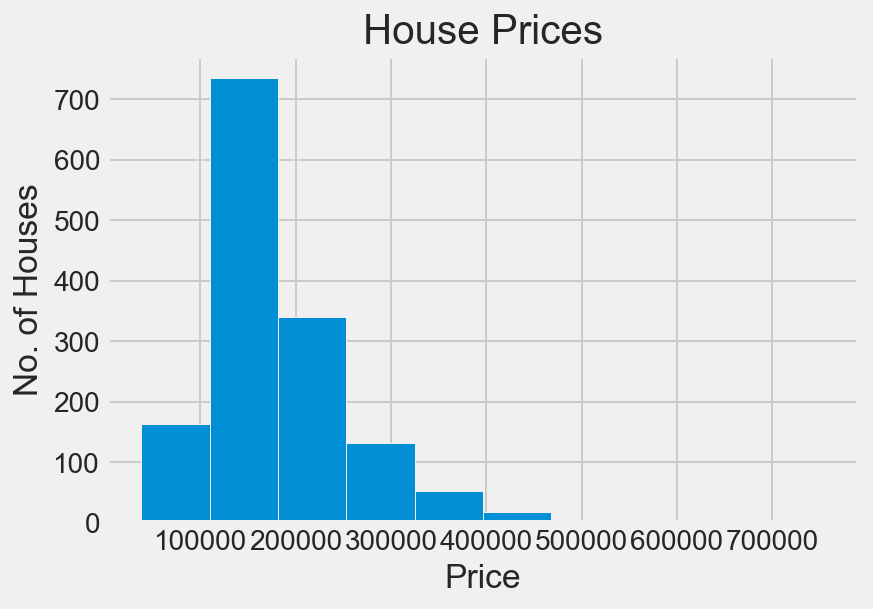

In [19]:
# Check distribution of SalePrice

plt.style.use('fivethirtyeight')
plt.hist(fixed_feat['SalePrice'])
plt.xlabel('Price')
plt.ylabel('No. of Houses')
plt.title('House Prices')

In [20]:
# Correlation between the continuous predictors and SalePrice

correlation = fixed_feat.corr(method='pearson')

In [21]:
correlation['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
GrLivArea       0.708658
GarageCars      0.642135
GarageArea      0.629831
TotalBsmtSF     0.612088
1stFlrSF        0.603300
FullBath        0.556674
TotRmsAbvGrd    0.533355
YearBuilt       0.517602
Fireplaces      0.463264
LotFrontage     0.337567
2ndFlrSF        0.319774
HalfBath        0.280882
LotArea         0.264715
BsmtFullBath    0.224054
BedroomAbvGr    0.162008
PoolArea        0.092396
BsmtHalfBath   -0.017561
YrSold         -0.025391
MSSubClass     -0.087487
KitchenAbvGr   -0.137825
Name: SalePrice, dtype: float64

# Feature Engineering (Continuous Variables)

In [22]:
# Feature engineering the age of the house when it was sold

fixed_feat['AgeSold'] = fixed_feat['AgeSold'].loc[:][fixed_feat['AgeSold']] = (fixed_feat['YrSold'] - fixed_feat['YearBuilt'])


/Users/Haziqah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# Feature engineering the total number of bathrooms in the house

fixed_feat['TotalBath'] = (fixed_feat['FullBath']*1) + (fixed_feat['HalfBath']*0.5) + (fixed_feat['BsmtFullBath']*1) + (fixed_feat['BsmtHalfBath']*0.5)

fixed_feat.head()

/Users/Haziqah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighborhood,MSZoning,Utilities,LandSlope,LandContour,Condition1,Condition2,LotFrontage,LotArea,Street,...,GarageType,GarageCars,GarageArea,YearBuilt,YrSold,SalePrice,PoolArea,MiscFeature,AgeSold,TotalBath
0,CollgCr,RL,AllPub,Gtl,Lvl,Norm,Norm,65.0,8450,Pave,...,Attchd,2,548,2003,2008,208500,0,None,0,3.5
1,Veenker,RL,AllPub,Gtl,Lvl,Feedr,Norm,80.0,9600,Pave,...,Attchd,2,460,1976,2007,181500,0,None,1,2.5
2,CollgCr,RL,AllPub,Gtl,Lvl,Norm,Norm,68.0,11250,Pave,...,Attchd,2,608,2001,2008,223500,0,None,2,3.5
3,Crawfor,RL,AllPub,Gtl,Lvl,Norm,Norm,60.0,9550,Pave,...,Detchd,3,642,1915,2006,140000,0,None,3,2.0
4,NoRidge,RL,AllPub,Gtl,Lvl,Norm,Norm,84.0,14260,Pave,...,Attchd,3,836,2000,2008,250000,0,None,4,3.5


In [24]:
# Redoing the correlation between continuous predictors and Sale Price

correlation = fixed_feat.corr(method='pearson')

correlation['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
GrLivArea       0.708658
GarageCars      0.642135
GarageArea      0.629831
TotalBath       0.627223
TotalBsmtSF     0.612088
1stFlrSF        0.603300
FullBath        0.556674
TotRmsAbvGrd    0.533355
YearBuilt       0.517602
Fireplaces      0.463264
LotFrontage     0.337567
2ndFlrSF        0.319774
HalfBath        0.280882
LotArea         0.264715
BsmtFullBath    0.224054
BedroomAbvGr    0.162008
PoolArea        0.092396
BsmtHalfBath   -0.017561
YrSold         -0.025391
MSSubClass     -0.087487
KitchenAbvGr   -0.137825
AgeSold        -0.454540
Name: SalePrice, dtype: float64

After carrying out feature engineering, it can be observed that it has created features with increased correlation strengths when compared to the original predictors.

The age of the house when it was sold (AgeSold) has a stronger negative correlation (-0.455) than YrSold (-0.025) with SalePrice. 

The total number of bathrooms (TotalBath) also has a stronger positive correlation (0.627) with SalePrice as compared to the original predictors, FullBath (0.557), HalfBath (0.281), BsmtFullBath (0.224) and BsmtHalfBath (-0.018).

In [25]:
# Dropping the Bathroom related features

fixed_feat.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'], axis = 1, inplace = True)



/Users/Haziqah/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Feature Engineering (Discrete Variables)

### Neighborhood Class

Feature engineering the 'class' of the neighborhood by classifying them based on the average prices of houses in each neighborhood. This was carried out to minimise the number of columns created when dummy coding later on.

The categories are as follows:
*  Low : Less than $ 200,000

*  Mid : Between $ 200,000  and $ 300,000

*  High : More than $ 300,000

In [26]:
# Getting the mean house price, sorted in descending order

neighborhood = fixed_feat['SalePrice'].groupby(by = fixed_feat['Neighborhood']).describe()

neighborhood.sort_values(by = ['mean'], ascending = False)

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
NoRidge,41.0,335295.317073,121412.658640,190000.0,265000.00,301500.0,341000.00,755000.0
NridgHt,77.0,316270.623377,96392.544954,154000.0,253293.00,315000.0,374000.00,611657.0
StoneBr,25.0,310499.000000,112969.676640,170000.0,213500.00,278000.0,377426.00,556581.0
Timber,38.0,242247.447368,64845.651549,137500.0,186900.00,228475.0,286115.75,378500.0
Veenker,11.0,238772.727273,72369.317959,162500.0,184250.00,218000.0,282000.00,385000.0
Somerst,86.0,225379.837209,56177.555888,144152.0,177975.00,225500.0,252919.50,423000.0
ClearCr,28.0,212565.428571,50231.538993,130000.0,183750.00,200250.0,242225.00,328000.0
Crawfor,51.0,210624.725490,68866.395472,90350.0,159250.00,200624.0,239000.00,392500.0
CollgCr,150.0,197965.773333,51403.666438,110000.0,152958.75,197200.0,225725.00,424870.0


In [27]:
# Assigning categories to the NbhdClass column

fixed_feat['NbhdClass'] = fixed_feat['NbhdClass'].loc[:][fixed_feat['SalePrice']> 200000] = 'mid'
fixed_feat['NbhdClass'].loc[:][fixed_feat['SalePrice'] > 300000] = 'high'
fixed_feat['NbhdClass'].loc[:][fixed_feat['SalePrice']< 200000] = 'low'

fixed_feat.head()


/Users/Haziqah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighborhood,MSZoning,Utilities,LandSlope,LandContour,Condition1,Condition2,LotFrontage,LotArea,Street,...,GarageCars,GarageArea,YearBuilt,YrSold,SalePrice,PoolArea,MiscFeature,AgeSold,TotalBath,NbhdClass
0,CollgCr,RL,AllPub,Gtl,Lvl,Norm,Norm,65.0,8450,Pave,...,2,548,2003,2008,208500,0,None,0,3.5,mid
1,Veenker,RL,AllPub,Gtl,Lvl,Feedr,Norm,80.0,9600,Pave,...,2,460,1976,2007,181500,0,None,1,2.5,low
2,CollgCr,RL,AllPub,Gtl,Lvl,Norm,Norm,68.0,11250,Pave,...,2,608,2001,2008,223500,0,None,2,3.5,mid
3,Crawfor,RL,AllPub,Gtl,Lvl,Norm,Norm,60.0,9550,Pave,...,3,642,1915,2006,140000,0,None,3,2.0,low
4,NoRidge,RL,AllPub,Gtl,Lvl,Norm,Norm,84.0,14260,Pave,...,3,836,2000,2008,250000,0,None,4,3.5,mid


In [28]:
# Dummy coding the NbhdClass column without dropping the first column

fixed_feat = pd.concat([fixed_feat, pd.get_dummies(fixed_feat['NbhdClass'], prefix = 'class_', drop_first = False)], axis =1)

fixed_feat.head()

,Neighborhood,MSZoning,Utilities,LandSlope,LandContour,Condition1,Condition2,LotFrontage,LotArea,Street,...,YrSold,SalePrice,PoolArea,MiscFeature,AgeSold,TotalBath,NbhdClass,class__high,class__low,class__mid
0,CollgCr,RL,AllPub,Gtl,Lvl,Norm,Norm,65.0,8450,Pave,...,2008,208500,0,None,0,3.5,mid,0,0,1
1,Veenker,RL,AllPub,Gtl,Lvl,Feedr,Norm,80.0,9600,Pave,...,2007,181500,0,None,1,2.5,low,0,1,0
2,CollgCr,RL,AllPub,Gtl,Lvl,Norm,Norm,68.0,11250,Pave,...,2008,223500,0,None,2,3.5,mid,0,0,1
3,Crawfor,RL,AllPub,Gtl,Lvl,Norm,Norm,60.0,9550,Pave,...,2006,140000,0,None,3,2.0,low,0,1,0
4,NoRidge,RL,AllPub,Gtl,Lvl,Norm,Norm,84.0,14260,Pave,...,2008,250000,0,None,4,3.5,mid,0,0,1


In [29]:
# Dropping the class__low so that it will be used as reference

fixed_feat.drop(['Neighborhood', 'NbhdClass','class__low'], axis = 1, inplace = True)

### Feature engineer basement

Assigning size categories to the basements. Basements that are larger than the median is considered 'big' while those below are considered 'small'. Houses with no basements will be assigned 'none'.

In [30]:
fixed_feat['TotalBsmtSF'].describe()

count    1450.000000
mean     1059.408966
std       439.207322
min         0.000000
25%       796.000000
50%       992.000000
75%      1301.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [31]:
fixed_feat['Bsmt'] = fixed_feat['Bsmt'].loc[:][fixed_feat['TotalBsmtSF'] > 1000] = 'big'
fixed_feat['Bsmt'].loc[:][fixed_feat['TotalBsmtSF'] < 1000] = 'small'
fixed_feat['Bsmt'].loc[:][fixed_feat['TotalBsmtSF'] == 0] = 'none'

fixed_feat.head()

,MSZoning,Utilities,LandSlope,LandContour,Condition1,Condition2,LotFrontage,LotArea,Street,Alley,...,YearBuilt,YrSold,SalePrice,PoolArea,MiscFeature,AgeSold,TotalBath,class__high,class__mid,Bsmt
0,RL,AllPub,Gtl,Lvl,Norm,Norm,65.0,8450,Pave,NoAccess,...,2003,2008,208500,0,None,0,3.5,0,1,small
1,RL,AllPub,Gtl,Lvl,Feedr,Norm,80.0,9600,Pave,NoAccess,...,1976,2007,181500,0,None,1,2.5,0,0,big
2,RL,AllPub,Gtl,Lvl,Norm,Norm,68.0,11250,Pave,NoAccess,...,2001,2008,223500,0,None,2,3.5,0,1,small
3,RL,AllPub,Gtl,Lvl,Norm,Norm,60.0,9550,Pave,NoAccess,...,1915,2006,140000,0,None,3,2.0,0,0,small
4,RL,AllPub,Gtl,Lvl,Norm,Norm,84.0,14260,Pave,NoAccess,...,2000,2008,250000,0,None,4,3.5,0,1,big


In [32]:
#check if correct

#fixed_feat[['TotalBsmtSF', 'Bsmt']]

In [33]:
# Dummy coding the Bsmt column without dropping the first column

fixed_feat = pd.concat([fixed_feat, pd.get_dummies(fixed_feat['Bsmt'], prefix = 'Bsmtsize_', drop_first = False)], axis =1)

fixed_feat.head()

,MSZoning,Utilities,LandSlope,LandContour,Condition1,Condition2,LotFrontage,LotArea,Street,Alley,...,PoolArea,MiscFeature,AgeSold,TotalBath,class__high,class__mid,Bsmt,Bsmtsize__big,Bsmtsize__none,Bsmtsize__small
0,RL,AllPub,Gtl,Lvl,Norm,Norm,65.0,8450,Pave,NoAccess,...,0,None,0,3.5,0,1,small,0,0,1
1,RL,AllPub,Gtl,Lvl,Feedr,Norm,80.0,9600,Pave,NoAccess,...,0,None,1,2.5,0,0,big,1,0,0
2,RL,AllPub,Gtl,Lvl,Norm,Norm,68.0,11250,Pave,NoAccess,...,0,None,2,3.5,0,1,small,0,0,1
3,RL,AllPub,Gtl,Lvl,Norm,Norm,60.0,9550,Pave,NoAccess,...,0,None,3,2.0,0,0,small,0,0,1
4,RL,AllPub,Gtl,Lvl,Norm,Norm,84.0,14260,Pave,NoAccess,...,0,None,4,3.5,0,1,big,1,0,0


In [34]:
# Dropping the Bsmtsize__none so that it will be used as reference

fixed_feat.drop(['Bsmt', 'Bsmtsize__none'], axis = 1, inplace = True)

### Garage size

Assigning size categories to the garages. Garagess that can hold more than 3 cars are considered 'large' while those that can hold 2 cars are considered 'medium' while those that can hold 1 car are considered 'small'. Houses with no garages will be assigned 'none'.

In [35]:
# checking the number of cars the garages can hold 

fixed_feat['GarageCars'].unique()

array([2, 3, 1, 0, 4])

In [36]:
fixed_feat['GarageSize'] = fixed_feat['GarageSize'].loc[:][fixed_feat['GarageCars'] == 0] = 'none'
fixed_feat['GarageSize'].loc[:][fixed_feat['GarageCars'] == 1] = 'small'
fixed_feat['GarageSize'].loc[:][fixed_feat['GarageCars'] == 2] = 'medium'
fixed_feat['GarageSize'].loc[:][fixed_feat['GarageCars'] >= 3] = 'large'

fixed_feat.head()

,MSZoning,Utilities,LandSlope,LandContour,Condition1,Condition2,LotFrontage,LotArea,Street,Alley,...,SalePrice,PoolArea,MiscFeature,AgeSold,TotalBath,class__high,class__mid,Bsmtsize__big,Bsmtsize__small,GarageSize
0,RL,AllPub,Gtl,Lvl,Norm,Norm,65.0,8450,Pave,NoAccess,...,208500,0,None,0,3.5,0,1,0,1,medium
1,RL,AllPub,Gtl,Lvl,Feedr,Norm,80.0,9600,Pave,NoAccess,...,181500,0,None,1,2.5,0,0,1,0,medium
2,RL,AllPub,Gtl,Lvl,Norm,Norm,68.0,11250,Pave,NoAccess,...,223500,0,None,2,3.5,0,1,0,1,medium
3,RL,AllPub,Gtl,Lvl,Norm,Norm,60.0,9550,Pave,NoAccess,...,140000,0,None,3,2.0,0,0,0,1,large
4,RL,AllPub,Gtl,Lvl,Norm,Norm,84.0,14260,Pave,NoAccess,...,250000,0,None,4,3.5,0,1,1,0,large


In [37]:
# check
#fixed_feat[['GarageCars', 'GarageSize']]

In [38]:
# Dummy coding the GarageSize column without dropping the first column

fixed_feat = pd.concat([fixed_feat, pd.get_dummies(fixed_feat['GarageSize'], prefix = 'GarageSize_', drop_first = False)], axis =1)

fixed_feat.head()


,MSZoning,Utilities,LandSlope,LandContour,Condition1,Condition2,LotFrontage,LotArea,Street,Alley,...,TotalBath,class__high,class__mid,Bsmtsize__big,Bsmtsize__small,GarageSize,GarageSize__large,GarageSize__medium,GarageSize__none,GarageSize__small
0,RL,AllPub,Gtl,Lvl,Norm,Norm,65.0,8450,Pave,NoAccess,...,3.5,0,1,0,1,medium,0,1,0,0
1,RL,AllPub,Gtl,Lvl,Feedr,Norm,80.0,9600,Pave,NoAccess,...,2.5,0,0,1,0,medium,0,1,0,0
2,RL,AllPub,Gtl,Lvl,Norm,Norm,68.0,11250,Pave,NoAccess,...,3.5,0,1,0,1,medium,0,1,0,0
3,RL,AllPub,Gtl,Lvl,Norm,Norm,60.0,9550,Pave,NoAccess,...,2.0,0,0,0,1,large,1,0,0,0
4,RL,AllPub,Gtl,Lvl,Norm,Norm,84.0,14260,Pave,NoAccess,...,3.5,0,1,1,0,large,1,0,0,0


In [39]:
# Dropping the GarageSize__none so that it will be used as reference

fixed_feat.drop(['GarageSize', 'GarageSize__none'], axis = 1, inplace = True)

### Overall Condition (Proximity)

Assigning scores to Condition1 and Condition2 as per the below table. 

| Value | Description | Score |
|-------|-------------|-------|
|Artery| Adjacent to arterial street | -2 |
|Feedr	| Adjacent to feeder street	| -2 |
       |Norm	|Normal	| 0 |
       |RRNn	|Within 200' of North-South Railroad| -1|
       |RRAn	|Adjacent to North-South Railroad| -2|
       |PosN	|Near positive off-site feature--park, greenbelt, etc.| 1|
       |PosA	|Adjacent to postive off-site feature| 2|
       |RRNe	|Within 200' of East-West Railroad|-1|
       |RRAe	|Adjacent to East-West Railroad|-2|
       
Based on research, it was found that buyers prefer to avoid houses near roads and thus, negative scores were given to houses with such conditions. If the house was adjacent to a road, it was given a higher negative score as it is nearer to the unwanted feature as compared to if it was within 200'. Positive scores were given in a similar fashion for positive features.

The scores for Condition1 and Condition2 were then added together to provide an overall score of the conditions around the house.

In [40]:
fixed_feat['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [41]:
fixed_feat['Proximity1'] = fixed_feat['Proximity1'].loc[:][fixed_feat['Condition1'] == 'Feedr'] = -2
fixed_feat['Proximity1'].loc[:][fixed_feat['Condition1'] == 'Artery'] = -2
fixed_feat['Proximity1'].loc[:][fixed_feat['Condition1'] == 'Norm'] = 0
fixed_feat['Proximity1'].loc[:][fixed_feat['Condition1'] == 'RRNn'] = -1
fixed_feat['Proximity1'].loc[:][fixed_feat['Condition1'] == 'RRAn'] = -2
fixed_feat['Proximity1'].loc[:][fixed_feat['Condition1'] == 'PosN'] = 1
fixed_feat['Proximity1'].loc[:][fixed_feat['Condition1'] == 'PosA'] = 2
fixed_feat['Proximity1'].loc[:][fixed_feat['Condition1'] == 'RRNe'] = -1
fixed_feat['Proximity1'].loc[:][fixed_feat['Condition1'] == 'RRAe'] = -2


#fixed_feat.head()

In [42]:
#check

#fixed_feat[['Condition1', 'Proximity1']]

In [43]:
fixed_feat['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [44]:
fixed_feat['Proximity2'] = fixed_feat['Proximity2'].loc[:][fixed_feat['Condition2'] == 'Feedr'] = -2
fixed_feat['Proximity2'].loc[:][fixed_feat['Condition2'] == 'Artery'] = -2
fixed_feat['Proximity2'].loc[:][fixed_feat['Condition2'] == 'Norm'] = 0
fixed_feat['Proximity2'].loc[:][fixed_feat['Condition2'] == 'RRNn'] = -1
fixed_feat['Proximity2'].loc[:][fixed_feat['Condition2'] == 'RRAn'] = -2
fixed_feat['Proximity2'].loc[:][fixed_feat['Condition2'] == 'PosN'] = 1
fixed_feat['Proximity2'].loc[:][fixed_feat['Condition2'] == 'PosA'] = 2
fixed_feat['Proximity2'].loc[:][fixed_feat['Condition2'] == 'RRNe'] = -1
fixed_feat['Proximity2'].loc[:][fixed_feat['Condition2'] == 'RRNAe'] = -2

#fixed_feat.head()

In [45]:
#check

#fixed_feat[['Condition2', 'Proximity2']]

In [46]:
#overall proximity score

fixed_feat['overall_prox'] = fixed_feat['Proximity1'] + fixed_feat['Proximity2']

In [47]:
# Dropping proximity1, proximity2

fixed_feat.drop(['Proximity1', 'Proximity2'], axis = 1, inplace = True)

# Dummy Coding Remaining Categorical Data

In [48]:
# Getting list of columns that need to be dummy coded

to_be_dummy_coded = list(fixed_feat.select_dtypes(include = 'object').columns)


In [49]:
print(to_be_dummy_coded)

['MSZoning', 'Utilities', 'LandSlope', 'LandContour', 'Condition1', 'Condition2', 'Street', 'Alley', 'LotShape', 'LotConfig', 'HouseStyle', 'BldgType', 'Foundation', 'BsmtExposure', 'GarageType', 'MiscFeature']


In [50]:
# Dummy coding without dropping first column 

for col in to_be_dummy_coded:
    fixed_feat = pd.concat([fixed_feat, pd.get_dummies(fixed_feat[col], prefix = col, drop_first = False)], axis =1)
    

In [51]:
# Dropping the columns with dtypes = object

fixed_feat.drop(to_be_dummy_coded, axis = 1, inplace = True)

In [52]:
# Get the number of columns, and column names
print(len(fixed_feat.columns), list(fixed_feat.columns))

107 ['LotFrontage', 'LotArea', 'MSSubClass', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YrSold', 'SalePrice', 'PoolArea', 'AgeSold', 'TotalBath', 'class__high', 'class__mid', 'Bsmtsize__big', 'Bsmtsize__small', 'GarageSize__large', 'GarageSize__medium', 'GarageSize__small', 'overall_prox', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Street_Grvl', 'Street_Pave', 'Alley_Grv

### Dropping specific columns to use them as reference

In [53]:
# 'MiscFeature_None'

fixed_feat.drop('MiscFeature_None', axis = 1, inplace = True)

In [54]:
# Residential Low Density

fixed_feat.drop('MSZoning_RL', axis = 1, inplace = True)

In [55]:
# No sewage

fixed_feat.drop('Utilities_NoSeWa', axis = 1, inplace = True)

In [56]:
# Gentle slope 

fixed_feat.drop('LandSlope_Gtl', axis = 1, inplace = True)


In [57]:
# Depression

fixed_feat.drop('LandContour_Low', axis = 1, inplace = True)


In [58]:
# Normal Condition (1)

fixed_feat.drop('Condition1_Norm', axis = 1, inplace = True)


In [59]:
# Normal Condition (2)

fixed_feat.drop('Condition2_Norm', axis = 1, inplace = True)

In [60]:
# Gravel street

fixed_feat.drop('Street_Grvl', axis = 1, inplace = True)

In [61]:
# No alley access 

fixed_feat.drop('Alley_NoAccess', axis = 1, inplace = True)


In [62]:
# Regular LotShape 

fixed_feat.drop('LotShape_Reg', axis = 1, inplace = True)

In [63]:
# Cul De Sac 

fixed_feat.drop('LotConfig_CulDSac', axis = 1, inplace = True)

In [64]:
# 1 story house 

fixed_feat.drop('HouseStyle_1Story', axis = 1, inplace = True)

In [65]:
# 1 family house 

fixed_feat.drop('BldgType_1Fam', axis = 1, inplace = True)

In [66]:
# Wood foundation 

fixed_feat.drop('Foundation_Wood', axis = 1, inplace = True)

In [67]:
# No BsmtExposure 

fixed_feat.drop('BsmtExposure_NoBsmt', axis = 1, inplace = True)

In [68]:
# No Garage

fixed_feat.drop('GarageType_NoGarage', axis = 1, inplace = True)


In [69]:
# Checking number of columns and column names

print(len(fixed_feat.columns), list(fixed_feat.columns))

91 ['LotFrontage', 'LotArea', 'MSSubClass', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YrSold', 'SalePrice', 'PoolArea', 'AgeSold', 'TotalBath', 'class__high', 'class__mid', 'Bsmtsize__big', 'Bsmtsize__small', 'GarageSize__large', 'GarageSize__medium', 'GarageSize__small', 'overall_prox', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'Utilities_AllPub', 'LandSlope_Mod', 'LandSlope_Sev', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Lvl', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_Corner', 'LotConfig_FR2', 'LotConfig_FR3', 'LotC

### Splitting Data into Test and Train

In [70]:
#splitting pre-2010 data for training and 2010 for test based on yrsold

train_data = fixed_feat.loc[:][fixed_feat['YrSold'] < 2010]

x_train_data = train_data.drop(['SalePrice', 'YrSold', 'YearBuilt'], axis = 1)
y_train_data = train_data['SalePrice']


In [71]:
print(x_train_data.shape, y_train_data.shape)

(1278, 88) (1278,)


In [72]:
test_data = fixed_feat.loc[:][fixed_feat['YrSold'] ==2010]

x_test_data = test_data.drop(['SalePrice', 'YrSold', 'YearBuilt'], axis = 1)

y_test_data = test_data['SalePrice']

In [73]:
print(x_test_data.shape, y_test_data.shape)

(172, 88) (172,)


### Standardising Predictors

In [74]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train_s = ss.fit_transform(x_train_data)

x_test_s = ss.transform(x_test_data)

/Users/Haziqah/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Haziqah/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Haziqah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


### Model Building

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [76]:
#fitting linear regression model (baseline)

# Set model

lr = LinearRegression()

# Fit model using train data

lr.fit(x_train_s, y_train_data)

# Score the fit model using the test data

print('test score:', lr.score(x_test_s, y_test_data))

test score: 0.8887953514695438


In [77]:
y_pred = lr.predict(x_test_s)

mse = metrics.mean_squared_error(y_test_data, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 26588.951328093597


In [78]:
lr.intercept_

181989.73488711216

In [79]:
#cross validation

scores = cross_val_score(lr, x_train_s, y_train_data, cv=5)
print('scores:', scores, 'mean score:', np.mean(scores))

scores: [ 9.05575791e-01 -2.86812550e+24  8.54314623e-01 -9.40970935e+21
 -1.12977765e+22] mean score: -5.777665966236365e+23


After fitting the linear regression model, the test score obtained was 0.889. The test score measures the accuracy of the model against the testing data, which is 88.9%. 

RMSE is a measure of the differences between values predicted by a model or an estimator and the values observed, and hence, the error between the predicted and actual value is $26,588.

### Regularisation

Lasso regularisation will be used so that any predictors that have multicollninearity will be excluded.

In [80]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV 


In [81]:
optimal_lasso = LassoCV(n_alphas=1000, cv=10, verbose=1)

optimal_lasso.fit(x_train_s, y_train_data)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1022.5595603427354


......................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished


In [82]:
optimal_lasso.score(x_test_s, y_test_data)

0.8857835248988314

In [83]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, x_train_s, y_train_data, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.91325329 0.91886505 0.90906378 0.88919025 0.85671431 0.86107305
 0.91386426 0.87142551 0.73709416 0.91008611]
0.8780629757486832


In [86]:
y_pred1 = lasso.predict(x_test_s)

mse1 = metrics.mean_squared_error(y_test_data, y_pred1)
rmse1 = np.sqrt(mse1)
print('RMSE:', rmse1)

RMSE: 26946.60862268854


In [87]:
lasso.intercept_

181989.78247261347

In [88]:
lasso_coefs = pd.DataFrame({'variable':x_train_data.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

#lasso_coefs

After fitting the lasso regression model, the test score obtained was 88.6% accuracy, which is slightly lower than 88.9%. This suggests that the model is able to predict the prices of 2010 houses well.

As mentioned earlier, RMSE is a measure of the differences between values predicted by a model or an estimator and the values observed, and hence, the error between the predicted and actual value is $26,946.60.  Again, this is slightly higher when compared to the baseline RMSE ($26,588).

Nonetheless, one advantage the lasso model has over the linear regerssion is that it has autofeature selection. Originally, the model used 88 predictors. After carrying out the lasso regression, it has reduced to 35 predictors. 



In [89]:
lasso_coefs.loc[:][lasso_coefs['coef'] > 0]

,variable,coef,abs_coef
16,class__high,37815.668867,37815.668867
3,GrLivArea,18693.168487,18693.168487
17,class__mid,17557.428657,17557.428657
11,GarageCars,7057.192524,7057.192524
10,TotalBsmtSF,5633.809852,5633.809852
15,TotalBath,5491.829708,5491.829708
71,Foundation_PConc,3671.648087,3671.648087
9,Fireplaces,3624.850984,3624.850984
75,BsmtExposure_Gd,2300.970869,2300.970869
79,GarageType_Attchd,1912.357484,1912.357484


When compared to a low class neighborhood, if all variables are held contant, the average SalePrice would increase by ~37815 is it is located in a high class neighborhood, while the average SalePrice would increase by ~17557 if it is in a mid class neighborhood.

The average SalePrice would also increase by ~18693 if there is an increase in the GrLivArea (all other variables held constant).

Basically the variables above have a positive relationship with the SalePrice. 


In [90]:
lasso_coefs.loc[:][lasso_coefs['coef'] < 0]

,variable,coef,abs_coef
7,KitchenAbvGr,-4205.412015,4205.412015
14,AgeSold,-3445.689653,3445.689653
26,MSZoning_RM,-3200.939258,3200.939258
44,Condition2_PosN,-1998.710874,1998.710874
6,BedroomAbvGr,-1469.329527,1469.329527
30,LandContour_Bnk,-1312.441575,1312.441575
33,Condition1_Artery,-1106.382912,1106.382912
34,Condition1_Feedr,-1041.590448,1041.590448
53,LotShape_IR3,-797.962459,797.962459
67,BldgType_Twnhs,-682.233510,682.233510


On the otherhand, the predictors above have a negative relationship to the SalePrice.

It is odd that kitchen, Condition2_PosN, and BedroomAbvGr are negatively correlated with SalePrice. Further investigation is needed.

The older the house, the lower is the price. The average SalePrice decreases by ~3445 if there is an increase in age (all variables constant).

In [91]:
lasso_coefs.loc[:][lasso_coefs['coef'] == 0]

,variable,coef,abs_coef
60,HouseStyle_2.5Fin,0.0,0.0
59,HouseStyle_1.5Unf,0.0,0.0
61,HouseStyle_2.5Unf,0.0,0.0
62,HouseStyle_2Story,-0.0,0.0
63,HouseStyle_SFoyer,-0.0,0.0
64,HouseStyle_SLvl,0.0,0.0
65,BldgType_2fmCon,-0.0,0.0
76,BsmtExposure_Mn,-0.0,0.0
68,BldgType_TwnhsE,0.0,0.0
69,Foundation_BrkTil,-0.0,0.0


The variables above were removed from the model. This may be due to multicollinearity with other predictors.

#### Trying out Ridge to compare

In [92]:
ridge_alphas = np.logspace(-2, 7, 50)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(x_train_s, y_train_data)

print(optimal_ridge.alpha_)

71.96856730011521


In [93]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, x_train_s, y_train_data, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.90422519 0.91670343 0.90571696 0.86508539 0.86360392 0.82658956
 0.90014637 0.86369658 0.70004978 0.9064076 ]
0.8652224800140159


In [94]:
ridge.fit(x_train_s, y_train_data)
ridge.score(x_test_s, y_test_data)

0.8944241211376432

In [95]:
y_pred2 = ridge.predict(x_test_s)

mse2 = metrics.mean_squared_error(y_test_data, y_pred2)
rmse2 = np.sqrt(mse2)
print('RMSE:', rmse2)

RMSE: 25907.296221205273


After carrying ridge regression, it was found that it gave a better score (89.4% accuracy), an d lower RMSE ($25,907) than lasso (88.6%) . However, the difference is small. In addition to that, it does not have auto-feature selection and thus, I would use the Lasso model due to easier interpretability and reduction in features (Occam's Razor). 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [96]:
# Getting all column names

print('Column names:', housec.columns)

Column names: Index(['index', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'G

In [148]:
# Selecting renovatable features

reno_feat = housec[['OverallQual', 'OverallCond', 'YearRemodAdd','RoofStyle', 'RoofMatl', 
                    'Exterior1st', 'Exterior2nd', 'MasVnrType','MasVnrArea', 'ExterQual', 
                    'ExterCond',  'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 
                    'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 
                    'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenQual', 'Functional', 
                    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                    'PoolQC', 'Fence', 'YrSold']]



In [149]:
reno_feat.head()

,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,YrSold
0,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,...,TA,Y,0,61,0,0,0,NaN,NaN,2008
1,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,...,TA,Y,298,0,0,0,0,NaN,NaN,2007
2,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,...,TA,Y,0,42,0,0,0,NaN,NaN,2008
3,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,...,TA,Y,0,35,272,0,0,NaN,NaN,2006
4,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,...,TA,Y,192,84,0,0,0,NaN,NaN,2008


# Feature Engineering

### Difference between Year Remodeled and Year Sold

This is to see if recent remodelling contributes to how fast the house gets sold.

In [150]:
#reno_feat['YrRemod'] = (reno_feat['YrSold'] - fixed_feat['YearRemodAdd'])

# Data Cleaning

### Convert OverallQual and OverallCOnd as strings so they can be dummy coded

In [151]:
reno_feat['OverallQual'] = reno_feat['OverallQual'].astype('object')

/Users/Haziqah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
reno_feat['OverallCond'] = reno_feat['OverallCond'].astype('object')

/Users/Haziqah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
# Checking dtypes
reno_feat.dtypes

OverallQual       object
OverallCond       object
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
BsmtQual          object
BsmtCond          object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
LowQualFinSF       int64
KitchenQual       object
Functional        object
FireplaceQu       object
GarageFinish      object
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolQC            object
Fence             object
YrSold             int64
dtype: object

### Replace NaN Values

In [154]:
# Checking for NaN values

reno_feat.isna().sum().sort_values(ascending = False)

PoolQC           1443
Fence            1172
FireplaceQu       681
GarageFinish       79
GarageCond         79
GarageQual         79
BsmtFinType2       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrType          8
MasVnrArea          8
Electrical          1
Exterior1st         0
Exterior2nd         0
RoofMatl            0
RoofStyle           0
BsmtFinSF1          0
YearRemodAdd        0
ExterQual           0
ExterCond           0
OverallCond         0
YrSold              0
Heating             0
BsmtFinSF2          0
BsmtUnfSF           0
HeatingQC           0
CentralAir          0
LowQualFinSF        0
KitchenQual         0
Functional          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
OverallQual         0
dtype: int64

In [155]:
#PoolQC NA = No Pool

reno_feat['PoolQC'].loc[:][reno_feat['PoolQC'].isna()] = 'None'


In [156]:
#Fence

reno_feat['Fence'].loc[:][reno_feat['Fence'].isna()] = 'None'

In [157]:
#Fireplace

reno_feat['FireplaceQu'].loc[:][reno_feat['FireplaceQu'].isna()] = 'None'

In [158]:
#MasVnrArea

reno_feat['MasVnrArea'].loc[:][reno_feat['MasVnrArea'].isna()] = 0

In [159]:
#GarageCond

reno_feat['GarageCond'].loc[:][reno_feat['GarageCond'].isna()] = 'None'


In [160]:
#GarageFinish

reno_feat['GarageFinish'].loc[:][reno_feat['GarageFinish'].isna()] = 'None'

In [161]:
#GarageQual

reno_feat['GarageQual'].loc[:][reno_feat['GarageQual'].isna()] = 'None'

In [164]:
#BsmtFinType2

reno_feat['BsmtFinType2'].loc[:][reno_feat['BsmtFinType2'].isna()] = 'None'

In [165]:
#BsmtFinType1

reno_feat['BsmtFinType1'].loc[:][reno_feat['BsmtFinType1'].isna()] = 'None'

In [166]:
#BsmtCond

reno_feat['BsmtCond'].loc[:][reno_feat['BsmtCond'].isna()] = 'None'

In [167]:
#BsmtCond

reno_feat['BsmtQual'].loc[:][reno_feat['BsmtQual'].isna()] = 'None'

In [168]:
#MasVnrType

reno_feat['MasVnrType'].loc[:][reno_feat['MasVnrType'].isna()] = 'None'

In [169]:
# Electrical

reno_feat['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [170]:
reno_feat['Electrical'].value_counts()

SBrkr    1328
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [171]:
# Imputing electrical with most common

reno_feat['Electrical'].loc[:][reno_feat['Electrical'].isna()] = 'SBrkr'

In [172]:
# Checking for null values again

reno_feat.isna().sum().sort_values(ascending = False)


YrSold           0
ExterQual        0
BsmtFinSF2       0
BsmtFinType2     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtCond         0
BsmtQual         0
ExterCond        0
MasVnrArea       0
Fence            0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
OverallCond      0
BsmtUnfSF        0
Heating          0
HeatingQC        0
CentralAir       0
PoolQC           0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
FireplaceQu      0
Functional       0
KitchenQual      0
LowQualFinSF     0
Electrical       0
OverallQual      0
dtype: int64

### Dummy Coding

In [173]:
#get list of columns that need to be dummy coded

to_be_dummy_coded1 = list(reno_feat.select_dtypes(include = 'object').columns)

to_be_dummy_coded1


['OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence']

In [174]:
for col in to_be_dummy_coded1:
    reno_feat = pd.concat([reno_feat, pd.get_dummies(reno_feat[col], prefix = col, drop_first = True)], axis =1)    

In [175]:
print(len(reno_feat.columns), list(reno_feat.columns))

176 ['OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'YrSold', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl

In [176]:
#drop the columns with dtypes = object

reno_feat.drop(to_be_dummy_coded1, axis = 1, inplace = True)

In [177]:
print(len(reno_feat.columns))

150


In [178]:
reno_feat.head()

,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,2003,196.0,706,0,150,0,0,61,0,0,...,1,0,1,0,0,1,0,0,0,1
1,1976,0.0,978,0,284,0,298,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2,2002,162.0,486,0,434,0,0,42,0,0,...,1,0,1,0,0,1,0,0,0,1
3,1970,0.0,216,0,540,0,0,35,272,0,...,1,0,1,0,0,1,0,0,0,1
4,2000,350.0,655,0,490,0,192,84,0,0,...,1,0,1,0,0,1,0,0,0,1


# Getting the Residuals from Model 1

Due to the higher accuracy, the ridge model was used to calculate the residuals.

In [179]:
#get the cost of renovations (y target)

var_train_price = ridge.predict(x_train_s)

y_train_reno = (y_train_data - var_train_price)

var_test_price = ridge.predict(x_test_s)

y_test_reno = (y_test_data - var_test_price)

In [180]:
#y_test_reno

In [181]:
#splitting pre-2010 data for training and 2010 for test based on yrsold

x_train_reno = reno_feat.loc[:][reno_feat['YrSold'] <2010]

In [182]:
x_train_reno = x_train_reno.drop(['YrSold'], axis = 1)

In [183]:
# x_train_reno = x_train_reno[['OverallCond', 'RoofMatl_WdShngl', 'OverallQual', 'Functional_Typ', 'PoolArea',
#                             'ScreenPorch', 'Exterior2nd_ImStucc', 'PoolQC_Gd', 'Exterior2nd_Stucco', 'YrRemod']]


In [184]:
x_test_reno = reno_feat.loc[:][reno_feat['YrSold']==2010]

In [185]:
x_test_reno = x_test_reno.drop(['YrSold'], axis = 1)

In [186]:
# x_test_reno = x_test_reno[['OverallCond', 'RoofMatl_WdShngl', 'OverallQual', 'Functional_Typ', 'PoolArea',
#                             'ScreenPorch', 'Exterior2nd_ImStucc', 'PoolQC_Gd', 'Exterior2nd_Stucco', 'YrRemod']]

In [187]:
#standardise predictors

ss = StandardScaler()

x_train_reno_s = ss.fit_transform(x_train_reno)

x_test_reno_s = ss.transform(x_test_reno) #dont fit_transform. just transform as it is unseen data

/Users/Haziqah/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Haziqah/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Haziqah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


# Building the Model

In [188]:
#fitting model (Baseline)

# # set model
lr1 = LinearRegression()
# # fit model using train data
lr1.fit(x_train_reno_s, y_train_reno)
# # score the fit model using the test data.
print('train score:', lr1.score(x_train_reno_s, y_train_reno))
print('test score:', lr1.score(x_test_reno_s, y_test_reno))

train score: 0.3771769957051253
test score: -6.090486051479987e+17


In [189]:
y_pred1 = lr1.predict(x_test_reno_s)

mse = metrics.mean_squared_error(y_test_reno, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

20211335469924.746


In [190]:
#cross validation

scores = cross_val_score(lr1, x_train_reno_s, y_train_reno, cv=5)
print('scores:', scores, 'mean score:', np.mean(scores))

scores: [-2.39827278e+22 -2.45463749e+23 -6.23781184e+25 -1.34487966e+20
 -5.23082753e+24] mean score: -1.35757053861331e+25


In [208]:
optimal_lasso1 = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso1.fit(x_train_reno_s, y_train_reno)

print(optimal_lasso1.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1257.4820695509413


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.0s finished


In [209]:
optimal_lasso1.score(x_test_reno_s, y_test_reno)

0.068876503687744

In [193]:
lasso1 = Lasso(alpha=optimal_lasso1.alpha_)

lasso_scores1 = cross_val_score(lasso1, x_train_reno_s, y_train_reno, cv=10)

print(lasso_scores1)
print(np.mean(lasso_scores1))

[ 0.03315658  0.18759948  0.23003902 -0.14372372  0.1318829   0.102069
 -0.03774627  0.08278834  0.05743927 -0.38673829]
0.025676629756280756


In [194]:
lasso1.fit(x_train_reno_s, y_train_reno)

Lasso(alpha=1257.4820695509413, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [195]:
lasso_coefs1 = pd.DataFrame({'variable':x_train_reno.columns,
                            'coef':lasso1.coef_,
                            'abs_coef':np.abs(lasso1.coef_)})

lasso_coefs1.sort_values('abs_coef', inplace=True, ascending=False)

#lasso_coefs1

In [196]:
lasso_coefs1.loc[:][lasso_coefs1['coef'] > 0]

,variable,coef,abs_coef
19,OverallQual_10,4560.867558,4560.867558
39,RoofMatl_WdShngl,2706.704041,2706.704041
121,Functional_Typ,2277.212747,2277.212747
25,OverallCond_7,1742.563503,1742.563503
10,ScreenPorch,1201.234437,1201.234437
26,OverallCond_8,934.176385,934.176385
0,YearRemodAdd,681.089918,681.089918
27,OverallCond_9,388.832159,388.832159
18,OverallQual_9,343.142886,343.142886
42,Exterior1st_BrkFace,261.493075,261.493075


From this model, it appears that there are 11 characteristics that the company should look out for when buying homes, to minimise renovations.

In general, the most important characteristic would be the overall material and finish of the house. It should be rated as Very Excellent or Excellent. The overall condition rating of the house should also be above Excellent. The home functionality seems to also play a rather important role, and should be a typical home.

In [197]:
lasso_coefs1.loc[:][lasso_coefs1['coef'] < 0]

,variable,coef,abs_coef
143,PoolQC_Gd,-3237.364565,3237.364565
21,OverallCond_3,-2051.760767,2051.760767
22,OverallCond_4,-808.465859,808.465859
23,OverallCond_5,-572.057061,572.057061
65,Exterior2nd_Stucco,-531.466974,531.466974
13,OverallQual_4,-186.961678,186.961678
116,Functional_Maj2,-147.729158,147.729158


The company could also look into buying homes which fit the conditions in the table above.
For instance, they could purchase homes of Average, Below Average or Fair conditions and renovate them to be Excellent or Very Excellent. This would be even better if the house meets certain criteria in the table before this, such as having a ScreenPorch or BrickFace. This features add value to the house and are not as easily renovateable as other features.

In [201]:
lasso_coefs1.loc[:][lasso_coefs1['coef'] == 0]

,variable,coef,abs_coef
106,HeatingQC_Po,-0.0,0.0
102,Heating_OthW,-0.0,0.0
103,Heating_Wall,0.0,0.0
104,HeatingQC_Fa,-0.0,0.0
105,HeatingQC_Gd,0.0,0.0
91,BsmtFinType1_Rec,0.0,0.0
84,BsmtCond_None,0.0,0.0
83,BsmtCond_Gd,-0.0,0.0
101,Heating_Grav,-0.0,0.0
109,Electrical_FuseF,-0.0,0.0


The variables above do not contribute to the SalePrice of the house so the company may want to focus on renovating other features.

Evaluate the effect in dollars of the renovate-able features.
How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money.
Investigate how much of the variance in price remaining is explained by these features.
Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

The company can also make a decision on whether to buy a property or not by looking at the residuals. If the residuals is negative, it is advisable for them to buy as this means that the actual value was higher than the s value of the house. This may be due to the poor condition of the house, and thus the company would have to spend more resources to make this house sellable.

That said, the  low accuracy of the second model (6.89%) suggests that the variance in price is not due to the renovateable features of the home. Further investigation is needed to determine the cause of the low accuracy or if other unexplored feature/characteristic accounts for this variance instead.